## 파이썬 고급
# Numpy 파일 입출력

- np.loadtxt() : 텍스트 파일을 불러오기
- np.genfromtxt() : loadtxt() 보다 상세한 기능 제공
- np.savetxt() : 텍스트 파일 저장하기
- np.save(), np.savez(), np.load() : Numpy array 를 바이너리 파일로 저장하고 불러오기
- 텍스트 파일 저장 방식 : ,(csv) \t(tsv, 엑셀) ; : 등으로 구분 
- 한글 인코딩 : utf-8, cp949 등 (한글 및 외국어를 파일로 저장하는 방식)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### loadtxt()

In [2]:
help(np.loadtxt)

Help on function loadtxt in module numpy.lib.npyio:

loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes')
    Load data from a text file.
    
    Each row in the text file must have the same number of values.
    
    Parameters
    ----------
    fname : file, str, or pathlib.Path
        File, filename, or generator to read.  If the filename extension is
        ``.gz`` or ``.bz2``, the file is first decompressed. Note that
        generators should return byte strings for Python 3k.
    dtype : data-type, optional
        Data-type of the resulting array; default: float.  If this is a
        structured data-type, the resulting array will be 1-dimensional, and
        each row will be interpreted as an element of the array.  In this
        case, the number of columns used must match the number of fields in
        the data-type.
    comments : str or sequence of str, optional
       

In [6]:
np.loadtxt('iris.csv', delimiter=',', skiprows=1, usecols=[0,1,2,3])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
X = np.loadtxt('iris.csv', skiprows=1, delimiter=',', usecols=[0,1,2,3])
X.shape

(150, 4)

In [2]:
b = b'abcdefg'

In [10]:
s = '하나둘'
b = s.encode(encoding='cp949')
b

b'\xc7\xcf\xb3\xaa\xb5\xd1'

In [12]:
b.decode(encoding='cp949')

'하나둘'

In [7]:
help(s.encode)

Help on built-in function encode:

encode(...) method of builtins.str instance
    S.encode(encoding='utf-8', errors='strict') -> bytes
    
    Encode S using the codec registered for encoding. Default encoding
    is 'utf-8'. errors may be given to set a different error
    handling scheme. Default is 'strict' meaning that encoding errors raise
    a UnicodeEncodeError. Other possible values are 'ignore', 'replace' and
    'xmlcharrefreplace' as well as any other name registered with
    codecs.register_error that can handle UnicodeEncodeErrors.



In [45]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',',
                  converters={4: lambda s: labels.index(s.decode())})
iris.shape

(150, 5)

- encoding : latin1, ascii, utf-8(파이썬 기본 인코딩), cp949(윈도우 기본 인코딩)

In [2]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris = np.loadtxt('iris.csv', skiprows=1, delimiter=',',
                  converters={4: lambda s: labels.index(s)},
                  encoding='utf-8')
iris.shape

(150, 5)

- 와인 데이터 불러오기

In [13]:
X = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1)

In [14]:
X.shape

(1599, 12)

In [16]:
X[:3]

array([[7.400e+00, 7.000e-01, 0.000e+00, 1.900e+00, 7.600e-02, 1.100e+01,
        3.400e+01, 9.978e-01, 3.510e+00, 5.600e-01, 9.400e+00, 5.000e+00],
       [7.800e+00, 8.800e-01, 0.000e+00, 2.600e+00, 9.800e-02, 2.500e+01,
        6.700e+01, 9.968e-01, 3.200e+00, 6.800e-01, 9.800e+00, 5.000e+00],
       [7.800e+00, 7.600e-01, 4.000e-02, 2.300e+00, 9.200e-02, 1.500e+01,
        5.400e+01, 9.970e-01, 3.260e+00, 6.500e-01, 9.800e+00, 5.000e+00]])

In [17]:
f = open('winequality-red.csv')
line = f.readline()
f.close()

line

'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n'

In [19]:
header = line.strip().split(';')
header=[i.strip('"') for i in header]
header

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [29]:
set(X[:,-1])

{3.0, 4.0, 5.0, 6.0, 7.0, 8.0}

In [31]:
(X[:,-1]==4).sum()

53

In [34]:
np.bincount(X[:,-1].astype(int))

array([  0,   0,   0,  10,  53, 681, 638, 199,  18], dtype=int64)

In [24]:
X_norm = (X - X.mean(axis=0))/X.std(axis=0)

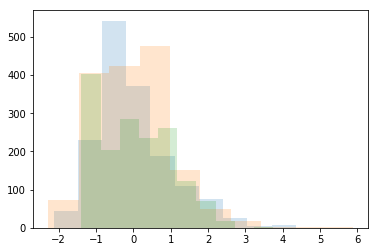

In [25]:
plt.hist(X_norm[:,0], alpha=0.2)
plt.hist(X_norm[:,1], alpha=0.2)
plt.hist(X_norm[:,2], alpha=0.2)
pass

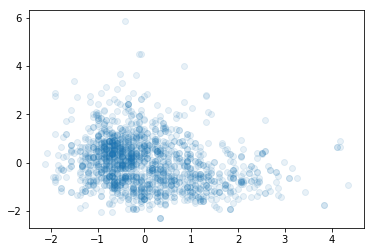

In [27]:
plt.scatter(X_norm[:,0], X_norm[:,1], alpha=0.1)

### genfromtxt()
- loadtxt() 보다 세밀한 기능 제공

In [8]:
help(np.genfromtxt)

Help on function genfromtxt in module numpy.lib.npyio:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
   

In [9]:
labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

iris = np.genfromtxt('iris.csv', skip_header=1, delimiter=',',
                     converters={4: lambda s: float(labels.index(s.decode()))})
iris.shape

(150, 5)

In [10]:
iris[0]

array([5.1, 3.5, 1.4, 0.2, 0. ])

### savetxt()

In [11]:
help(np.savetxt)

Help on function savetxt in module numpy.lib.npyio:

savetxt(fname, X, fmt='%.18e', delimiter=' ', newline='\n', header='', footer='', comments='# ', encoding=None)
    Save an array to a text file.
    
    Parameters
    ----------
    fname : filename or file handle
        If the filename ends in ``.gz``, the file is automatically saved in
        compressed gzip format.  `loadtxt` understands gzipped files
        transparently.
    X : 1D or 2D array_like
        Data to be saved to a text file.
    fmt : str or sequence of strs, optional
        A single format (%10.5f), a sequence of formats, or a
        multi-format string, e.g. 'Iteration %d -- %10.5f', in which
        case `delimiter` is ignored. For complex `X`, the legal options
        for `fmt` are:
    
        * a single specifier, `fmt='%.4e'`, resulting in numbers formatted
          like `' (%s+%sj)' % (fmt, fmt)`
        * a full string specifying every real and imaginary part, e.g.
          `' %.4e %+.4ej %.4e 

In [11]:
np.savetxt('iris2.csv', iris, delimiter='파이썬', fmt='%.2f') # 윈도우에서는 인코딩이 cp949 로 적용됨 

- 한글이 들어간 경우 encoding='utf-8' 또는 encoding='cp949' 를 적용해 본다

In [15]:
iris = np.loadtxt('iris2.csv', delimiter='파이썬', encoding='cp949')
iris.shape

(150, 5)

In [23]:
iris

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

### 기상 데이터 불러오기
- ```기상관측_서울_20181004141633.csv```
- https://data.kma.go.kr/data/grnd/selectAsosRltmList.do?pgmNo=36

In [35]:
import pandas as pd

In [20]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, skipfooter=0, doublequote=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read CSV (comma-separated) file into DataFrame
    
    Also supports optionally itera

In [36]:
import pandas as pd

cli = pd.read_csv('climate.csv', delimiter=',', encoding='cp949')
cli

,지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),...,0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)
0,108,2015-01-01,-7.7,-9.8,745,-4.3,1500.0,NaN,NaN,NaN,...,3.4,5.6,8.3,15.5,17.3,NaN,1.4,NaN,{황사}0615-{황사}{강도0}0900-0955.,NaN
1,108,2015-01-02,-6.0,-9.0,730,-1.9,1513.0,NaN,NaN,NaN,...,3.3,6.0,8.2,15.4,17.3,NaN,1.6,NaN,NaN,NaN
2,108,2015-01-03,-2.7,-9.2,429,3.1,1511.0,NaN,NaN,NaN,...,3.2,5.9,8.1,15.3,17.3,NaN,1.0,0.0,NaN,NaN
3,108,2015-01-04,2.5,0.2,534,8.5,1521.0,0.08,NaN,NaN,...,3.1,5.7,7.9,15.1,17.2,NaN,0.6,NaN,{비}0845-0850. {연무}1610-{연무}{강도0}1800-1925. {박무...,NaN
4,108,2015-01-05,3.7,-1.1,409,7.9,1433.0,3.83,NaN,NaN,...,3.1,5.7,7.8,15.1,17.2,NaN,0.7,3.4,{비}1920-2040. {비}2105-2125. {비}2150-{비}{강도0}24...,NaN
5,108,2015-01-06,-3.2,-7.6,2346,4.0,1.0,3.67,NaN,NaN,...,3.1,5.7,7.8,15.0,17.2,NaN,0.9,NaN,-{비}-{비}{강도0}0300-{진눈깨비}0305-0340. -{박무}-{박무}{...,NaN
6,108,2015-01-07,-5.5,-8.9,327,-0.6,1529.0,NaN,NaN,NaN,...,3.0,5.5,7.6,14.9,17.1,NaN,0.9,NaN,NaN,NaN
7,108,2015-01-08,-5.1,-9.5,732,-0.2,1453.0,NaN,NaN,NaN,...,3.0,5.5,7.6,14.9,17.1,NaN,0.8,NaN,NaN,NaN
8,108,2015-01-09,-2.1,-6.8,753,3.5,1518.0,NaN,NaN,NaN,...,2.9,5.4,7.5,14.7,17.1,NaN,1.2,NaN,NaN,NaN
9,108,2015-01-10,-0.3,-5.6,730,4.8,1530.0,NaN,NaN,NaN,...,2.8,5.3,7.3,14.6,17.0,NaN,1.2,NaN,NaN,NaN


In [37]:
cli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 60 columns):
지점                     1372 non-null int64
일시                     1372 non-null object
평균기온(°C)               1372 non-null float64
최저기온(°C)               1372 non-null float64
최저기온 시각(hhmi)          1372 non-null int64
최고기온(°C)               1371 non-null float64
최고기온 시각(hhmi)          1371 non-null float64
강수 계속시간(hr)            517 non-null float64
10분 최다 강수량(mm)         333 non-null float64
10분 최다강수량 시각(hhmi)     239 non-null float64
1시간 최다강수량(mm)          333 non-null float64
1시간 최다 강수량 시각(hhmi)    243 non-null float64
일강수량(mm)               517 non-null float64
최대 순간 풍속(m/s)          1370 non-null float64
최대 순간 풍속 풍향(16방위)      1370 non-null float64
최대 순간풍속 시각(hhmi)       1370 non-null float64
최대 풍속(m/s)             1370 non-null float64
최대 풍속 풍향(16방위)         1370 non-null float64
최대 풍속 시각(hhmi)         1370 non-null float64
평균 풍속(m/s)             1369 non-null float64
풍정합(

In [40]:
data = cli[['평균기온(°C)', '최저기온(°C)','평균 상대습도(%)']].values

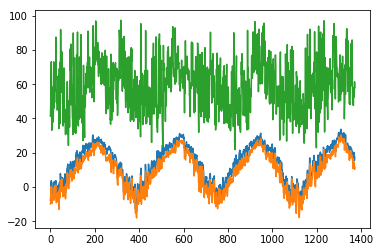

In [42]:
plt.plot(data)

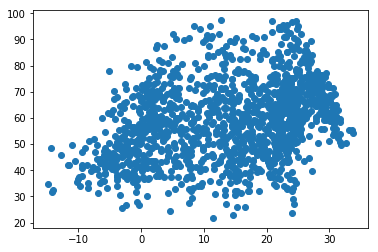

In [43]:
plt.scatter(data[:,0], data[:,2])

In [24]:
s = '108,2015-01-01,-7.7,-9.8,745,-4.3,1500,,,,,,,12.1,270,510,6.5,320,1256,4.6,3999,-18.8,29,8,41.4,1.4,1013.6,1026.7,2216,1022.8,8,1024.9,9.6,8.9,1200,1.7,9.79,,,,,,.8,0,-4.1,-10.9,-3.4,-2,-.2,.7,3.4,5.6,8.3,15.5,17.3,,1.4,,{황사}0615-{황사}{강도0}0900-0955.,'
cols = s.strip().split(',')
print(cols)

['108', '2015-01-01', '-7.7', '-9.8', '745', '-4.3', '1500', '', '', '', '', '', '', '12.1', '270', '510', '6.5', '320', '1256', '4.6', '3999', '-18.8', '29', '8', '41.4', '1.4', '1013.6', '1026.7', '2216', '1022.8', '8', '1024.9', '9.6', '8.9', '1200', '1.7', '9.79', '', '', '', '', '', '.8', '0', '-4.1', '-10.9', '-3.4', '-2', '-.2', '.7', '3.4', '5.6', '8.3', '15.5', '17.3', '', '1.4', '', '{황사}0615-{황사}{강도0}0900-0955.', '']


In [29]:
len(cols)

60

In [25]:
s = '지점,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),10분 최다 강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다 강수량 시각(hhmi),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),평균 이슬점온도(°C),최소 상대습도(%),최소 상대습도 시각(hhmi),평균 상대습도(%),평균 증기압(hPa),평균 현지기압(hPa),최고 해면기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다일사 시각(hhmi),1시간 최다일사량(MJ/m2),합계 일사(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0m 지중온도(°C),1.5m 지중온도(°C),3.0m 지중온도(°C),5.0m 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),기사,안개 계속시간(hr)'
cols = s.strip().split(',')
for i,c in enumerate(cols):
    print('%03d => %s' % (i,c))

000 => 지점
001 => 일시
002 => 평균기온(°C)
003 => 최저기온(°C)
004 => 최저기온 시각(hhmi)
005 => 최고기온(°C)
006 => 최고기온 시각(hhmi)
007 => 강수 계속시간(hr)
008 => 10분 최다 강수량(mm)
009 => 10분 최다강수량 시각(hhmi)
010 => 1시간 최다강수량(mm)
011 => 1시간 최다 강수량 시각(hhmi)
012 => 일강수량(mm)
013 => 최대 순간 풍속(m/s)
014 => 최대 순간 풍속 풍향(16방위)
015 => 최대 순간풍속 시각(hhmi)
016 => 최대 풍속(m/s)
017 => 최대 풍속 풍향(16방위)
018 => 최대 풍속 시각(hhmi)
019 => 평균 풍속(m/s)
020 => 풍정합(100m)
021 => 평균 이슬점온도(°C)
022 => 최소 상대습도(%)
023 => 최소 상대습도 시각(hhmi)
024 => 평균 상대습도(%)
025 => 평균 증기압(hPa)
026 => 평균 현지기압(hPa)
027 => 최고 해면기압(hPa)
028 => 최고 해면기압 시각(hhmi)
029 => 최저 해면기압(hPa)
030 => 최저 해면기압 시각(hhmi)
031 => 평균 해면기압(hPa)
032 => 가조시간(hr)
033 => 합계 일조 시간(hr)
034 => 1시간 최다일사 시각(hhmi)
035 => 1시간 최다일사량(MJ/m2)
036 => 합계 일사(MJ/m2)
037 => 일 최심신적설(cm)
038 => 일 최심신적설 시각(hhmi)
039 => 일 최심적설(cm)
040 => 일 최심적설 시각(hhmi)
041 => 합계 3시간 신적설(cm)
042 => 평균 전운량(1/10)
043 => 평균 중하층운량(1/10)
044 => 평균 지면온도(°C)
045 => 최저 초상온도(°C)
046 => 평균 5cm 지중온도(°C)
047 => 평균 10cm 지중온도(°C)
048 => 평균 20cm 지중온도(°C)
049

In [26]:
np.loadtxt('기상관측_서울_20181004141633.csv', skiprows=1, delimiter=',',
           usecols=[2,3,5],
           converters = {2: lambda s: float(s) if s!='' else 0,
                        3: lambda s: float(s) if s!='' else 0,
                        5: lambda s: float(s) if s!='' else 0},
           encoding='cp949')

array([[-7.7, -9.8, -4.3],
       [-6. , -9. , -1.9],
       [-2.7, -9.2,  3.1],
       ...,
       [15.4, 13. , 19.7],
       [15.9, 10.3, 22. ],
       [17.3, 11.2, 24.2]])

In [33]:
f = open('기상관측_서울_20181004141633.csv', encoding='cp949')

f.readline()

data = []

for line in f:
    l = line.strip().split(',')
    l2 = [int(i) for i in l[1].split('-')]
    data.append(l2)

f.close()

data

[[2015, 1, 1],
 [2015, 1, 2],
 [2015, 1, 3],
 [2015, 1, 4],
 [2015, 1, 5],
 [2015, 1, 6],
 [2015, 1, 7],
 [2015, 1, 8],
 [2015, 1, 9],
 [2015, 1, 10],
 [2015, 1, 11],
 [2015, 1, 12],
 [2015, 1, 13],
 [2015, 1, 14],
 [2015, 1, 15],
 [2015, 1, 16],
 [2015, 1, 17],
 [2015, 1, 18],
 [2015, 1, 19],
 [2015, 1, 20],
 [2015, 1, 21],
 [2015, 1, 22],
 [2015, 1, 23],
 [2015, 1, 24],
 [2015, 1, 25],
 [2015, 1, 26],
 [2015, 1, 27],
 [2015, 1, 28],
 [2015, 1, 29],
 [2015, 1, 30],
 [2015, 1, 31],
 [2015, 2, 1],
 [2015, 2, 2],
 [2015, 2, 3],
 [2015, 2, 4],
 [2015, 2, 5],
 [2015, 2, 6],
 [2015, 2, 7],
 [2015, 2, 8],
 [2015, 2, 9],
 [2015, 2, 10],
 [2015, 2, 11],
 [2015, 2, 12],
 [2015, 2, 13],
 [2015, 2, 14],
 [2015, 2, 15],
 [2015, 2, 16],
 [2015, 2, 17],
 [2015, 2, 18],
 [2015, 2, 19],
 [2015, 2, 20],
 [2015, 2, 21],
 [2015, 2, 22],
 [2015, 2, 23],
 [2015, 2, 24],
 [2015, 2, 25],
 [2015, 2, 26],
 [2015, 2, 27],
 [2015, 2, 28],
 [2015, 3, 1],
 [2015, 3, 2],
 [2015, 3, 3],
 [2015, 3, 4],
 [2015, 3, 5],

### 어레이를 바이너리 파일로 저장하기

In [46]:
type(iris), iris.shape

(numpy.ndarray, (150, 5))

In [47]:
np.save('iris.npy', iris)

In [52]:
a = [[1,2,3],[4,5,6]]
b = [1,2,3,4,5]

In [48]:
iris2 = np.load('iris.npy')
iris2.shape

(150, 5)

In [49]:
iris2

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ],
       [5.4, 3.9, 1.7, 0.4, 0. ],
       [4.6, 3.4, 1.4, 0.3, 0. ],
       [5. , 3.4, 1.5, 0.2, 0. ],
       [4.4, 2.9, 1.4, 0.2, 0. ],
       [4.9, 3.1, 1.5, 0.1, 0. ],
       [5.4, 3.7, 1.5, 0.2, 0. ],
       [4.8, 3.4, 1.6, 0.2, 0. ],
       [4.8, 3. , 1.4, 0.1, 0. ],
       [4.3, 3. , 1.1, 0.1, 0. ],
       [5.8, 4. , 1.2, 0.2, 0. ],
       [5.7, 4.4, 1.5, 0.4, 0. ],
       [5.4, 3.9, 1.3, 0.4, 0. ],
       [5.1, 3.5, 1.4, 0.3, 0. ],
       [5.7, 3.8, 1.7, 0.3, 0. ],
       [5.1, 3.8, 1.5, 0.3, 0. ],
       [5.4, 3.4, 1.7, 0.2, 0. ],
       [5.1, 3.7, 1.5, 0.4, 0. ],
       [4.6, 3.6, 1. , 0.2, 0. ],
       [5.1, 3.3, 1.7, 0.5, 0. ],
       [4.8, 3.4, 1.9, 0.2, 0. ],
       [5. , 3. , 1.6, 0.2, 0. ],
       [5. , 3.4, 1.6, 0.4, 0. ],
       [5.2, 3.5, 1.5, 0.2, 0. ],
       [5.2, 3.4, 1.4, 0.2, 0. ],
       [4.7, 3

In [53]:
np.save('iris2.npy', [a,b] )

In [57]:
data = np.load('iris2.npy')

In [58]:
type(data)

numpy.ndarray

In [59]:
data[0]

[[1, 2, 3], [4, 5, 6]]

In [60]:
data[1]

[1, 2, 3, 4, 5]

In [24]:
np.savez('iris.npz', X=iris[:,:4], y=iris[:,4])

In [25]:
arch = np.load('iris.npz')

In [27]:
arch['X'].shape, arch['y'].shape

((150, 4), (150,))